# **5-Class Sentiment Classification: Understanding Sentiment Categories**


In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("/content/sample_data/Movies_Review_Multi_Class.csv")
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


<Axes: xlabel='Sentiment'>

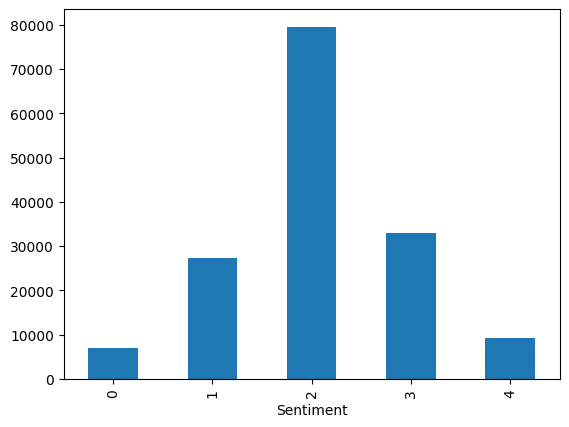

In [4]:
data.groupby(['Sentiment']).size().plot.bar()

<Axes: title={'center': 'Chart Sentiment Class'}, ylabel='Sentiment'>

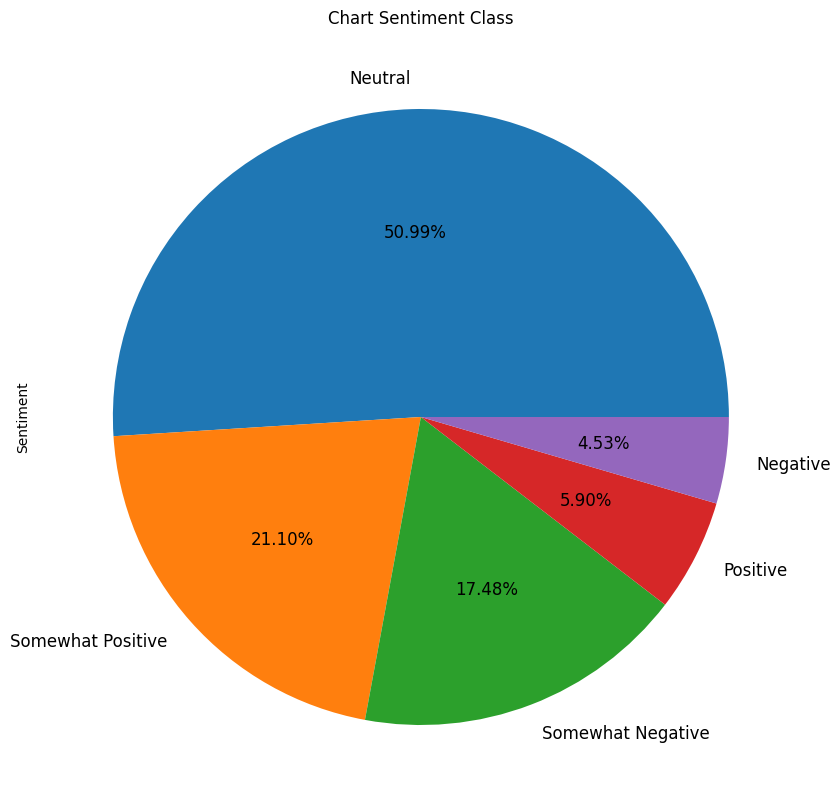

In [5]:
data2=data.copy(deep=True)


pie1 = pd.DataFrame(data2['Sentiment']
    .replace(0, 'Negative')
    .replace(1, 'Somewhat Negative')
    .replace(2, 'Neutral')
    .replace(3, 'Somewhat Positive')
    .replace(4, 'Positive')
    .value_counts())

# Reset the index, rename columns
pie1.reset_index(inplace=True)
pie1.columns = ['Sentiment_Label', 'Sentiment']  # Renaming columns for clarity

# Plotting the pie chart
pie1.plot(
    kind='pie',
    title='Chart Sentiment Class',
    y='Sentiment',
    autopct='%1.2f%%',
    shadow=False,
    labels=pie1['Sentiment_Label'],
    legend=False,
    fontsize=12,
    figsize=(10, 10)
)

In [6]:
# function to clean whole text
def clean_review(review, stemmer = PorterStemmer(), stop_words = set(stopwords.words("english"))):
    #removing html tags from reviews
    soup = BeautifulSoup(review, "html.parser")
    no_html_review = soup.get_text().lower()

    # empty list for adding clean words
    clean_text = []
    # cleaning stopwords and not alpha characters
    for word in review.split():
        if word not in stop_words and word.isalpha():
            clean_text.append(stemmer.stem(word))

    return " ".join(clean_text)

In [7]:
%time
data.Phrase = data.Phrase.apply(clean_review)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 16.2 µs


<ipython-input-6-4bca7e02739a>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(review, "html.parser")


In [8]:
# setting max_features to 5000 to get most repeated 5000 words in reviews
cv = CountVectorizer(max_features=5000)

In [9]:
# Fitting countvectorizer in data.review and getting X for ML
X = cv.fit_transform(data.Phrase).toarray()

In [10]:
#checking shape of out features(X)
X.shape

(156060, 5000)

In [11]:
# extracting the last column sentiment in y
y = data.iloc[:,-1].values

In [12]:
# converting X, y into train test split
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.3, random_state=42, stratify=data.Sentiment)

In [13]:
clf2 = MultinomialNB()

clf2.fit(train_X, train_Y)

MultinomialNB()

In [14]:
predict2 = clf2.predict(test_X)

print("Multinomial NaiveBayes:", accuracy_score(predict2, test_Y))

Multinomial NaiveBayes: 0.6078004186424025


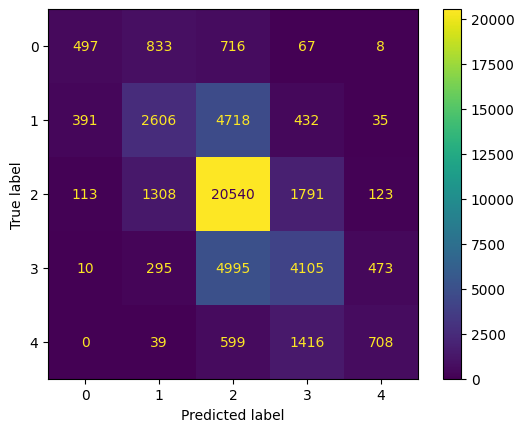

In [15]:
# Generate confusion matrix
confusion_matrix = metrics.confusion_matrix(test_Y, predict2)

# Get unique labels from test_Y using np.unique() for a NumPy array
unique_labels = np.unique(test_Y)

# Display confusion matrix with correct labels
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=unique_labels)

# Plot the confusion matrix
cm_display.plot()
plt.show()
